<a href="https://colab.research.google.com/github/ssk2001/AI-Project/blob/main/Yelp_Data_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas


In [ ]:
!pip install matplotlib

In [ ]:
!pip install seaborn

In [ ]:
!pip install wordcloud

In [ ]:
!pip install sklearn.preprocessing

In [ ]:
!pip install joblib

In [ ]:
!pip install scikit-learn


In [ ]:
!pip install xgboost

In [21]:
!pip install streamlit

In [8]:
!pip install streamlit ngrok

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 11.1 MB/s eta 0:00:00


In [61]:
!pip install nltk

In [62]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast
import streamlit as st

from wordcloud import WordCloud, STOPWORDS
from sklearn.preprocessing import OneHotEncoder

import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

from joblib import dump,load
# %matplotlib notebook
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.cluster import KMeans

import random
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestRegressor

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [72]:
data = pd.read_csv('Yelp dataset 2.csv')

In [73]:
data.shape

(239, 67)

In [4]:
data.head()

,RestaurantName,Address Line 1,City,State,PostalCode,Cuisine,Phone,StoreTiming-Mon,StoreTiming-Tue,StoreTiming-Wed,...,Dine In/Reservation (Grey),Claimed,Open Now (Y/N),Payment Options (Black),Category,website,Description,url,black_owned,source
0,Chick & Jajang,243 Westlake Ctr,Daly City,CA,94015.0,"Korean, Noodles, Chicken Shop",(650) 755-2100,11:00 AM - 9:00 PM,11:00 AM - 9:00 PM,11:00 AM - 9:00 PM,...,N,Y,Y,N,Restaurants&sort_by=date_desc,http://www.chicknjajang.com,We are Korean Fusion Restaurant.\n\nRead more,https://www.yelp.com/biz/chick-and-jajang-daly...,NaN,yelp.com
1,Best Kept Secret,1055 Taraval St,San Francisco,CA,94116.0,"Lounges, Cocktail Bars, Breakfast & Brunch",(415) 598-8220,Closed,Closed,6:00 PM - 12:00 AM,...,N,Y,Y,N,Restaurants&sort_by=date_desc,http://www.bks-sf.com,Welcome to sunsets newest restaurant and cockt...,https://www.yelp.com/biz/best-kept-secret-san-...,NaN,yelp.com
2,Seapot,383 Gellert Blvd,Daly City,CA,94015.0,"Hot Pot, Korean, Taiwanese",NaN,11:00 AM - 3:00 PM\n\n5:00 PM - 10:00 PM,11:00 AM - 3:00 PM\n\n5:00 PM - 10:00 PM,11:00 AM - 3:00 PM\n\n5:00 PM - 10:00 PM,...,N,Y,Y,N,Restaurants&sort_by=date_desc,https://www.seapotdalycity.com,Business owner information\n\n\t\n\nSunny H.\n...,https://www.yelp.com/biz/seapot-daly-city?osq=...,NaN,yelp.com
3,Simmer Huang Miao Grill,148 Serramonte Ctr,Daly City,CA,94015.0,Chinese,(650) 331-1511,11:00 AM - 3:00 PM\n\n5:00 PM - 9:30 PM,11:00 AM - 3:00 PM\n\n5:00 PM - 9:30 PM,11:00 AM - 3:00 PM\n\n5:00 PM - 9:30 PM,...,N,Y,N,N,Restaurants&sort_by=date_desc,https://www.miaogrill.com,NaN,https://www.yelp.com/biz/simmer-huang-miao-gri...,NaN,yelp.com
4,JJamPPong,5249 Mission St,San Francisco,CA,94112.0,"Chinese, Korean, Seafood",(415) 347-7412,11:00 AM - 3:00 PM\n\n4:00 PM - 8:30 PM,Closed,11:00 AM - 3:00 PM\n\n4:00 PM - 8:30 PM,...,N,Y,Y,N,Restaurants&sort_by=date_desc,NaN,Check us out on TikTok and Instagram. tiktok.c...,https://www.yelp.com/biz/jjamppong-san-francis...,NaN,yelp.com


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239 entries, 0 to 238
Data columns (total 67 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   RestaurantName               239 non-null    object 
 1   Address Line 1               238 non-null    object 
 2   City                         238 non-null    object 
 3   State                        238 non-null    object 
 4   PostalCode                   238 non-null    float64
 5   Cuisine                      239 non-null    object 
 6   Phone                        222 non-null    object 
 7   StoreTiming-Mon              231 non-null    object 
 8   StoreTiming-Tue              231 non-null    object 
 9   StoreTiming-Wed              231 non-null    object 
 10  StoreTiming-Thu              231 non-null    object 
 11  StoreTiming-Fri              231 non-null    object 
 12  StoreTiming-Sat              231 non-null    object 
 13  StoreTiming-Sun     

In [6]:
data['No of Ratings'].describe()

,No of Ratings
count,239
unique,213
top,75
freq,4


In [7]:
data.columns

Index(['RestaurantName', 'Address Line 1', 'City', 'State', 'PostalCode',
       'Cuisine', 'Phone', 'StoreTiming-Mon', 'StoreTiming-Tue',
       'StoreTiming-Wed', 'StoreTiming-Thu', 'StoreTiming-Fri',
       'StoreTiming-Sat', 'StoreTiming-Sun', 'Price Range', 'Rating',
       'No of Ratings', 'Rating1', 'Review1', 'Date 1', 'Rating2', 'Review2',
       'Date 2', 'Rating3', 'Review3', 'Date 3', 'Rating4', 'Review4',
       'Date 4', 'Rating5', 'Review5', 'Date 5', 'Rating6', 'Review6',
       'Date 6', 'Rating7', 'Review7', 'Date 7', 'Rating8', 'Review8',
       'Date 8', 'Rating9', 'Review9', 'Date 9', 'Rating10', 'Review10',
       'Date 10', 'paginationVariable', 'Special Hours', 'Notes',
       'Covid Related Info', 'Additional', 'Pickup/Takeout (Black)',
       'Pickup/Takeout (Grey)', 'Delivery (Black)', 'Delivery (Grey)',
       'Dine In/Reservation (Black)', 'Dine In/Reservation (Grey)', 'Claimed',
       'Open Now (Y/N)', 'Payment Options (Black)', 'Category', 'website',
   

In [9]:
#exploring address related columns
data.loc[:,['Address Line 1','City','State','PostalCode']].sample(15,random_state=1)

,Address Line 1,City,State,PostalCode
233,3230 Mission St,San Francisco,CA,94110.0
193,4435 Mission St,San Francisco,CA,94112.0
88,942 Geneva Ave,San Francisco,CA,94112.0
95,3991 24th St,San Francisco,CA,94114.0
213,1235 9th Ave,San Francisco,CA,94122.0
4,5249 Mission St,San Francisco,CA,94112.0
93,590 20th St,San Francisco,CA,94107.0
27,382 Grand Ave,South San Francisco,CA,94080.0
169,3 St Francis Square,Daly City,CA,94015.0
236,586 San Mateo Ave,San Bruno,CA,94066.0


In [ ]:
#drop unecessary columns
#column_to_drop = ['Address Line 1','Phone']
#data.drop(columns=column_to_drop, axis=1, inplace=True)

In [10]:
#look for duplicate values and drop the same
print("No. of Duplicates in dataset: ", data.duplicated().sum())

No. of Duplicates in dataset:  0


In [ ]:
#data.drop_duplicates(inplace=True)

In [ ]:
type(data.Review1 [0])

str

In [16]:
#check first set
data.Review1

,Review1
0,When I walked in I thought it's order at the c...
1,Loved the bottomless brunch on Saturday in the...
2,Went here for both hot pot and Korean bbq. Foo...
3,"I've eaten here about a half dozen times, star..."
4,JJamPpong has been trending on social media wi...
...,...
234,Fiance brought me for my birthday and it was a...
235,My favorite place to get roast duck. I love ge...
236,A pop up located inside Pho de Nguyen on the w...
237,Got the lo mein it was mediocre. 6 small piece...


In [15]:
#check second set
data.Review2

,Review2
0,Located in westlake plaza by UPS.\nI called in...
1,Been here a few times since they opened and th...
2,SHOUT OUT TO OUR SERVER HAILEY for taking care...
3,Service was attentive and the restaurant was p...
4,I love this place so much. It's my go to place...
...,...
234,"The service was incredibly efficient, very wel..."
235,Hole in the wall restaurant serving familiar C...
236,The prahok was one of the best I've had. I hop...
237,Review is based on 1 visit.\n\nThis location s...


*data*.Cuisine

In [ ]:
data.Cuisine

,Cuisine
0,"American (New), Desserts, Cocktail Bars"
1,"Thai, Food Trucks"
2,Italian
3,Sushi Bars
4,"Cocktail Bars, American (New)"
5,"Pizza, Food Stands"
6,Japanese
7,Chinese
8,"Pizza, Italian, Bars"
9,Mexican


In [12]:
data['Rating'].head(20)

,Rating
0,4.5
1,5.0
2,4.0
3,4.0
4,5.0
5,4.5
6,4.0
7,4.0
8,4.0
9,4.5


Mean is :  4.2154811715481175


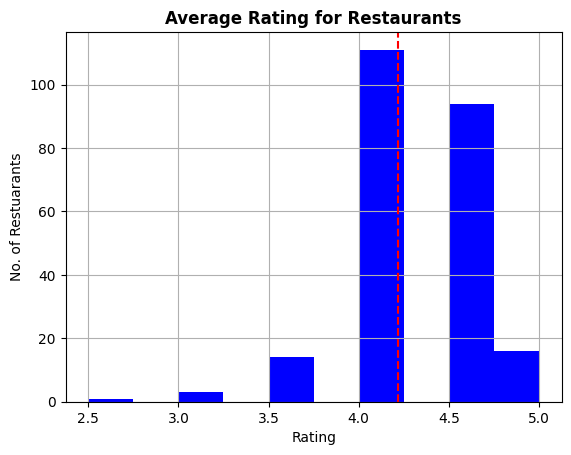

In [68]:
data.Rating.hist(color='blue')
plt.axvline(x=data.Rating.mean(),ls='--',color='red')
plt.title('Average Rating for Restaurants', weight='bold')
plt.xlabel('Rating')
plt.ylabel('No. of Restuarants')
print("Mean is : ", data.Rating.mean())

In [20]:
# restaurants and their count
data.RestaurantName.value_counts().head(20)

,count
RestaurantName,
Chick & Jajang,1
Toyose,1
Mimino,1
Chicano Nuevo,1
Ushi Taro Ramen,1
The Pupuseria,1
Hibachi Truck,1
Ocean Thai,1
New China Restaurant,1


In [22]:
#plt.figure(figsize=(12,6))
#ax=data.RestaurantName.value_counts()[:20].plot(kind='bar')
#ax.legend(['* Restaurants'])
#plt.xlabel('No. of Restuarants')
#plt.ylabel('Count of Restuarants')
#plt.title("Name Vs Count of Top 20 Restaurants", fontsize=20, weight='bold')

,count
Delivery (Black),
Y,153
N,86


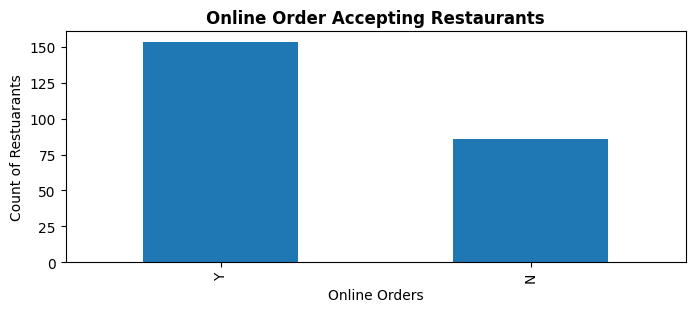

In [31]:
# Restaurants accepting orders online
plt.figure(figsize=(8,3))
ax =data['Delivery (Black)'].value_counts().plot(kind='bar')
plt.xlabel('Online Orders')
plt.ylabel('Count of Restuarants')
plt.title("Online Order Accepting Restaurants", weight='bold')

data['Delivery (Black)'].value_counts()

Text(0.5, 1.0, 'Postal Code')

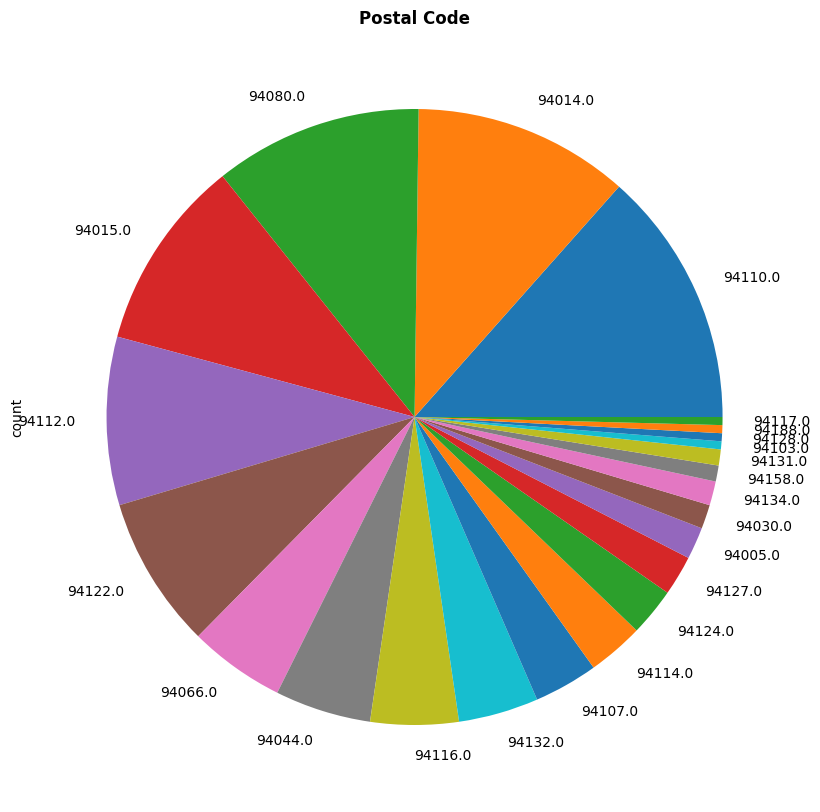

In [33]:
# Area having max number of restaurants
plt.figure(figsize=(10,10))
ax = data.PostalCode.value_counts().plot(kind='pie')
plt.title('Postal Code',weight='bold')


In [88]:
# As its complex to visualize, lets consider top 10 locations
#plt.figure(figsize=(8,8))
#ax = data.PostalCode.value_counts().iloc[:10].plot(kind='pie')
#plt.title('Location',weight='bold')

Text(0, 0.5, 'Count')

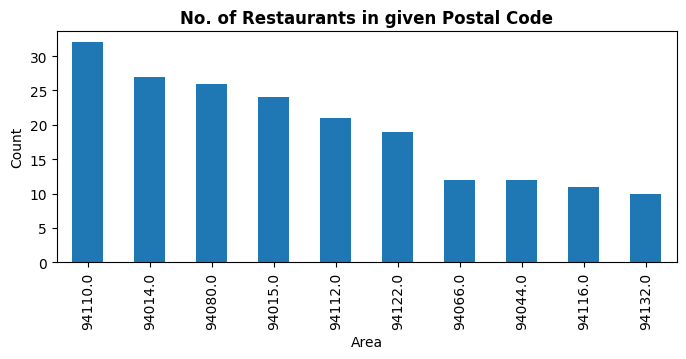

In [89]:
plt.figure(figsize=(8,3))
# Get the value counts and select the top 10
top_10_postal_codes = data.PostalCode.value_counts().head(10)

# Plot the top 10 postal codes
ax = top_10_postal_codes.plot(kind='bar')

plt.title('No. of Restaurants in given Postal Code',weight='bold')
plt.xlabel('Area')
plt.ylabel('Count')

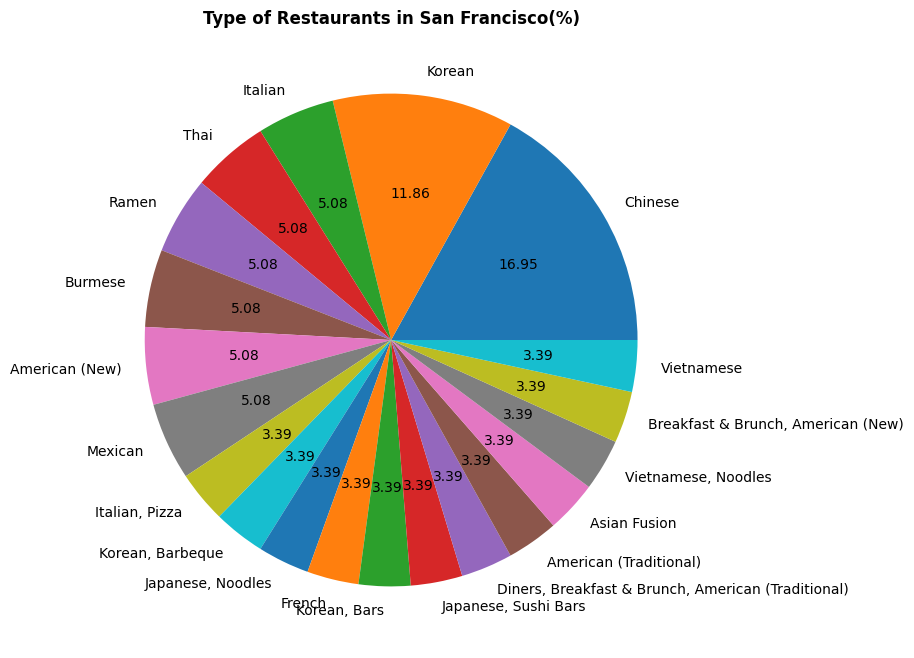

In [90]:
# types of restaurants in an area
plt.figure(figsize=(8,8))
values = data.Cuisine.value_counts()[:20]
labels = data['Cuisine'].value_counts()[:20].index
plt.pie(values, labels=labels, autopct='%.2f')
plt.title('Type of Restaurants in San Francisco(%)',weight='bold')
plt.show()

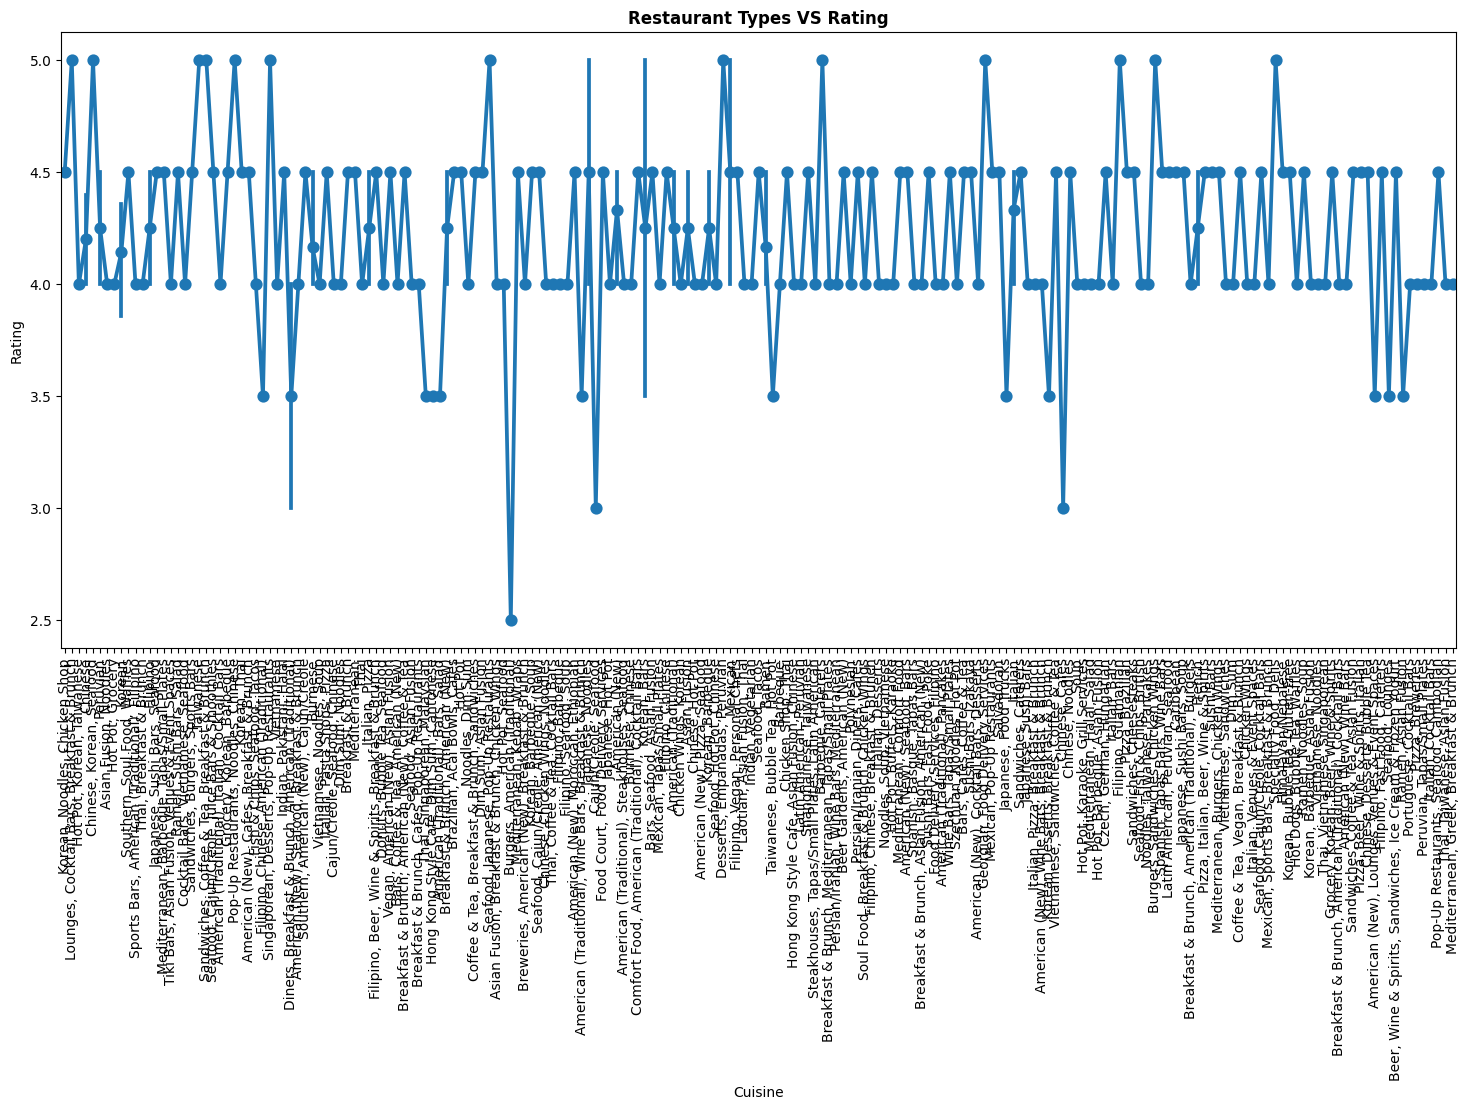

In [91]:
# Rate VS Restaurant graph plot
f, ax=plt.subplots(figsize=(18,8))
g = sns.pointplot(x=data["Cuisine"], y=data["Rating"], data=data)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.title("Restaurant Types VS Rating", weight='bold')
plt.show()

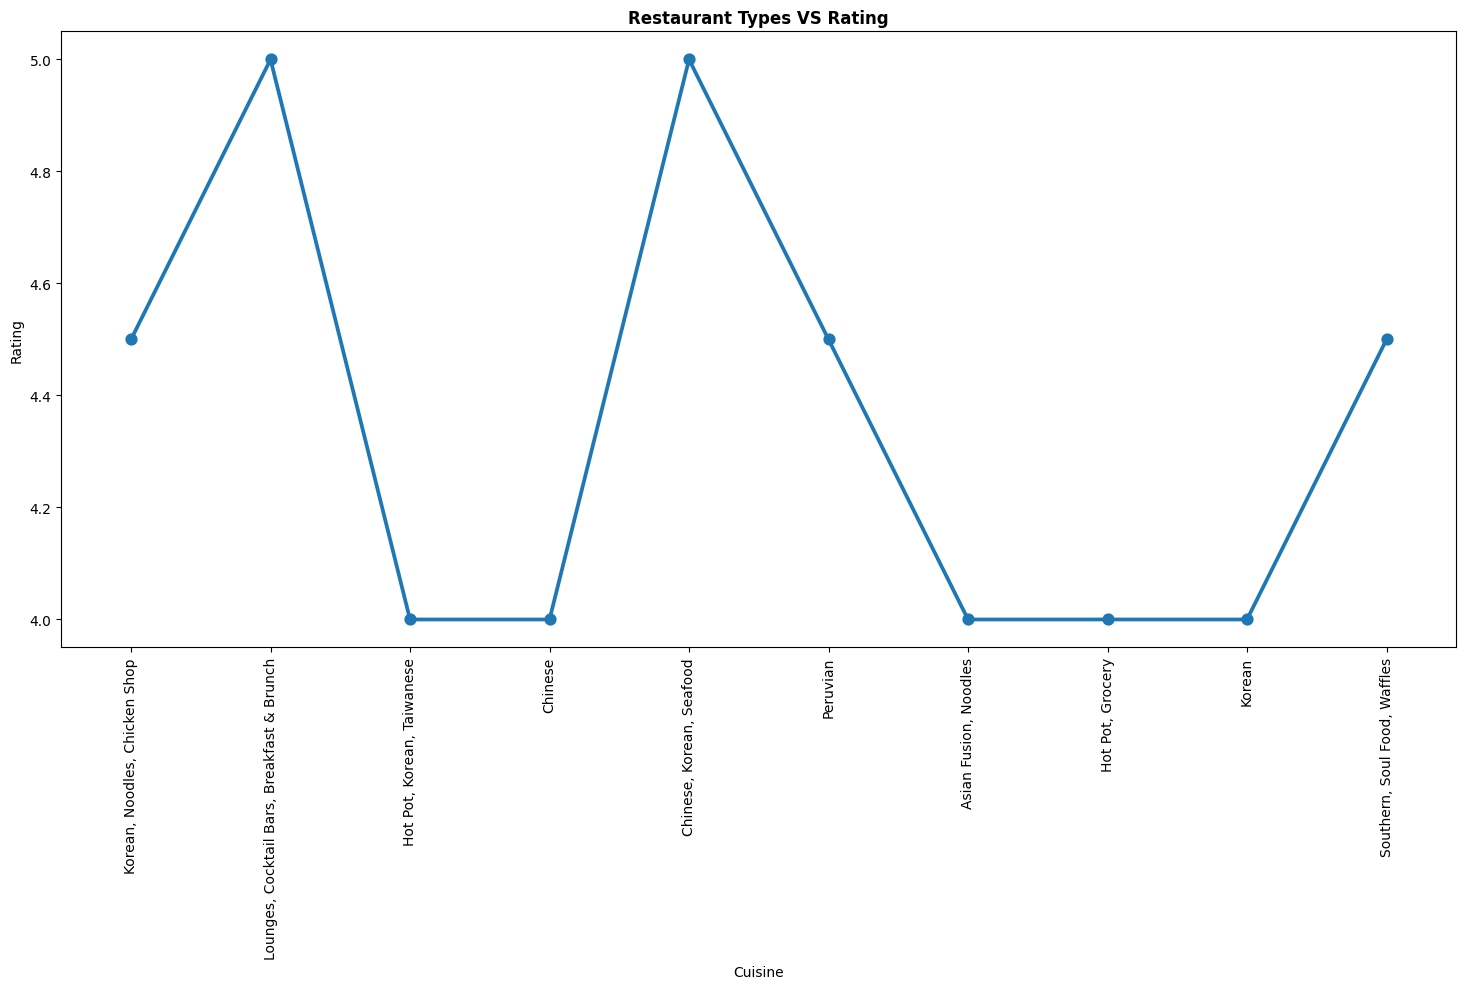

In [92]:

# Rate VS Restaurant graph plot
f, ax=plt.subplots(figsize=(18,8))
#only considering first 10 rows for better visualization and accuracy
g = sns.pointplot(x=data["Cuisine"][:10], y=data["Rating"][:10], data=data[:10])
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.title("Restaurant Types VS Rating", weight='bold')
plt.show()


Text(0, 0.5, 'No. of restaurants')

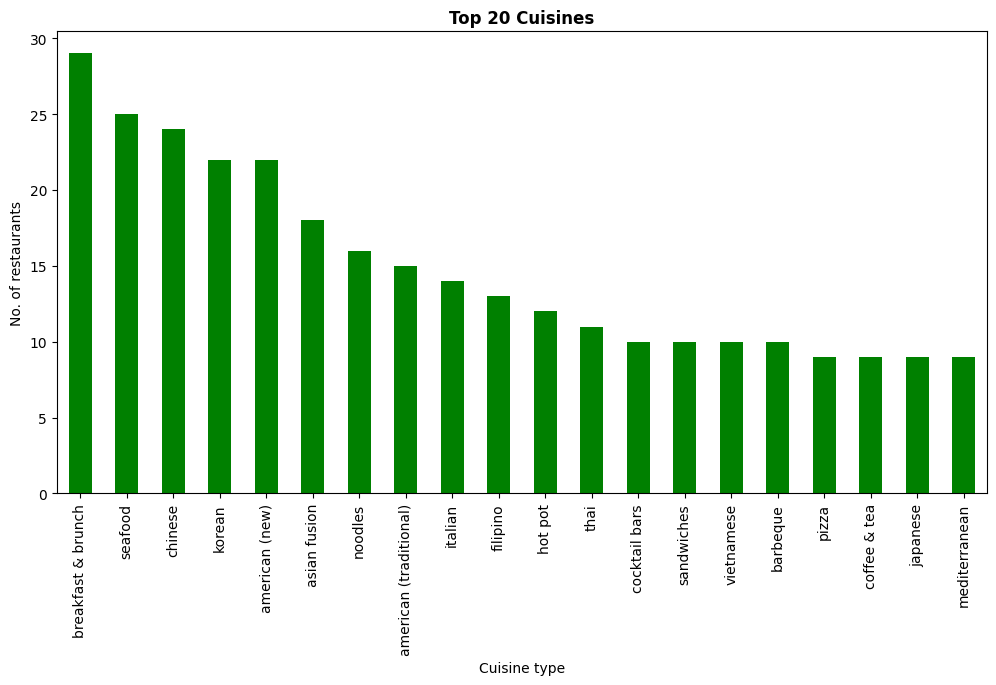

In [93]:
# Finding out top 10 cuisines
cuisines_data = data[data.Cuisine.notnull()]
cuisines_data.Cuisine = cuisines_data.Cuisine.apply(lambda x:x.lower().strip())
cuisines_count= []
for i in cuisines_data.Cuisine:
    for j in i.split(','):
        j = j.strip()
        cuisines_count.append(j)

plt.figure(figsize=(12,6))
pd.Series(cuisines_count).value_counts()[:20].plot(kind='bar', color ='green')
plt.title('Top 20 Cuisines', weight='bold')
plt.xlabel('Cuisine type')
plt.ylabel('No. of restaurants')

In [96]:
text = ' '.join(data['Review1'].astype(str))

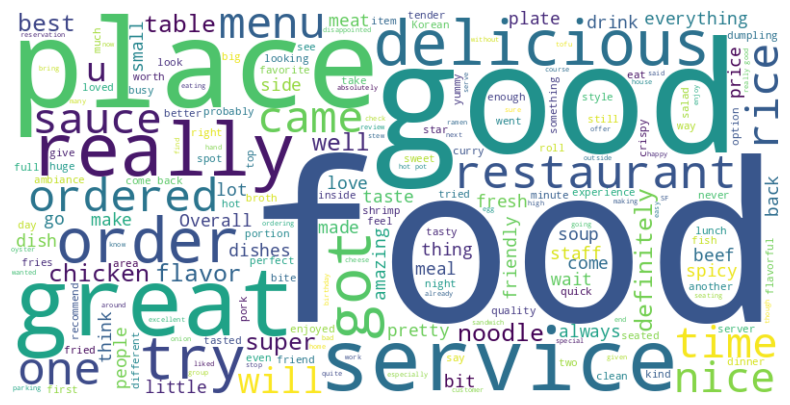

In [97]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Remove axis
plt.show()


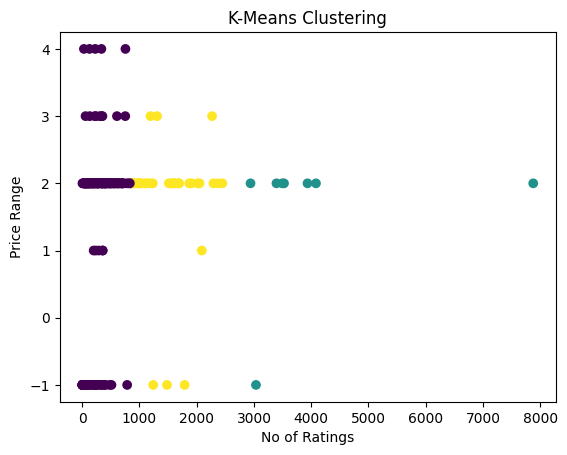

In [100]:
data = pd.read_csv('Yelp dataset 2.csv')

# Assuming your 'Price Range' column contains values like '$', '$$', '$$$', etc.
price_range_mapping = {
    '$': 1,
    '$$': 2,
    '$$$': 3,
    '$$$$': 4,
    # Add more mappings as needed based on your data
}


# Convert 'Price Range' column to numerical representation
# Handle missing values during mapping using fillna
data['PriceRange'] = data['PriceRange'].map(price_range_mapping).fillna(-1)
# Now, select the features with numerical values
features = data[['No of Ratings', 'PriceRange']]

# Alternatively, Drop rows with NaN in 'Price Range'
features = features.dropna()

# Continue with your KMeans clustering:
kmeans = KMeans(n_clusters=3)
kmeans.fit(features)
data['Cluster'] = kmeans.labels_

plt.scatter(data['No of Ratings'], data['PriceRange'], c=data['Cluster'], cmap='viridis')
plt.xlabel('No of Ratings')
plt.ylabel('Price Range')
plt.title('K-Means Clustering')
plt.show()



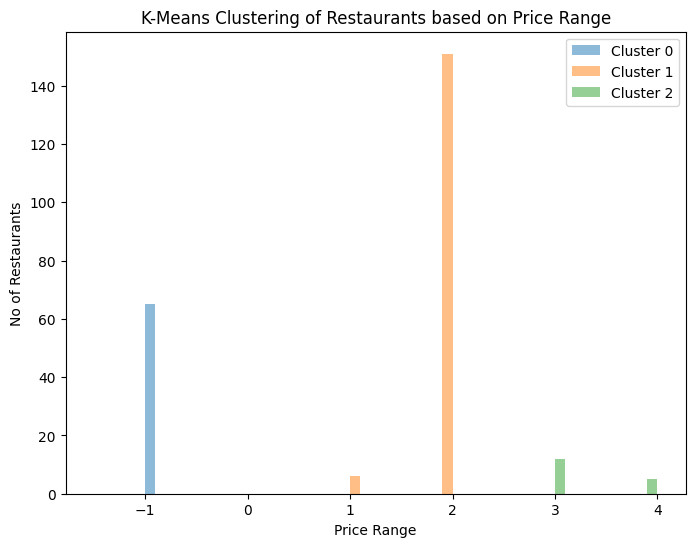

In [101]:
data = pd.read_csv('Yelp dataset 2.csv')


price_range_mapping = {
    '': 0,
    '$': 1,
    '$$': 2,
    '$$$': 3,
    '$$$$': 4,
}


data['PriceRange'] = data['PriceRange'].map(price_range_mapping).fillna(-1)


features = data[['PriceRange']]  #


# Alternatively, Drop rows with NaN in 'Price Range'
features = features.dropna()

# Continue KMeans clustering:
kmeans = KMeans(n_clusters=3)
kmeans.fit(features)
data['Cluster'] = kmeans.labels_


plt.figure(figsize=(8, 6))



for i in range(3):
    plt.hist(data['PriceRange'][data['Cluster'] == i], alpha=0.5, label=f'Cluster {i}')

plt.xlabel('Price Range')
plt.ylabel('No of Restaurants')
plt.title('K-Means Clustering of Restaurants based on Price Range')
plt.legend()
plt.show()

In [102]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer

data = pd.read_csv('Yelp dataset 2.csv')

reviews = data['Review1']

# Initialize VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Apply sentiment analysis to the reviews, handling non-string values
data['sentiment'] = reviews.apply(lambda x: sid.polarity_scores(str(x))['compound'] if isinstance(x, (str, bytes)) else float('nan'))


def classify_sentiment(score):
    if score >= 0.05:
        return 'positive'
    elif score <= -0.05:
        return 'negative'
    else:
        return 'neutral'

data['sentiment_category'] = data['sentiment'].apply(classify_sentiment)


                                             Review1  sentiment  \
0  When I walked in I thought it's order at the c...     0.9595   
1  Loved the bottomless brunch on Saturday in the...     0.9879   
2  Went here for both hot pot and Korean bbq. Foo...     0.9554   
3  I've eaten here about a half dozen times, star...     0.7086   
4  JJamPpong has been trending on social media wi...     0.9959   

  sentiment_category  
0           positive  
1           positive  
2           positive  
3           positive  
4           positive  


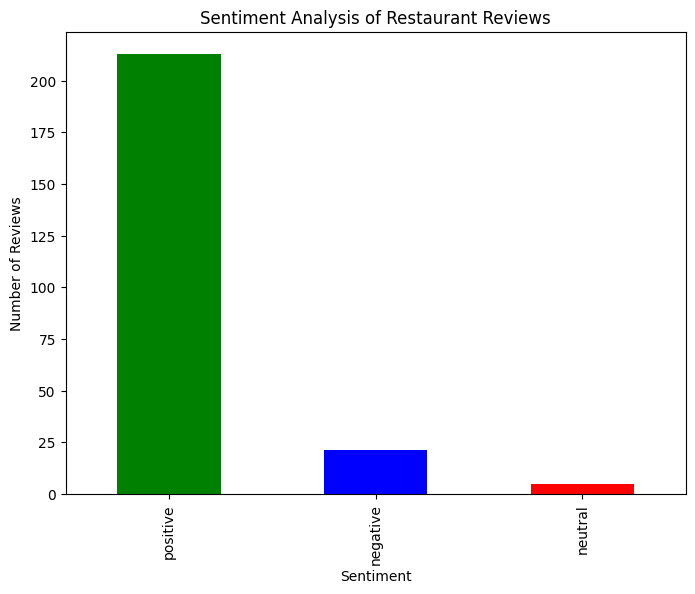

In [103]:
# Display the first few rows with the sentiment categories
print(data[['Review1', 'sentiment', 'sentiment_category']].head())

import matplotlib.pyplot as plt

sentiment_counts = data['sentiment_category'].value_counts()

plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['green', 'blue', 'red'])
plt.title('Sentiment Analysis of Restaurant Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.show()


In [113]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL

# Load your dataset (ensure correct date format and indexing)
df = pd.read_csv('Yelp dataset 2.csv', parse_dates=['Date1'], index_col='Date2')

# Ensure the data is sorted by date and resample if necessary
df = df.resample('D').mean()  # Resample to daily, adjust based on your data's frequency

# STL decomposition
stl = STL(df['Rating1'], period=7)  # Adjust the period based on the seasonality of your data
result = stl.fit()

# Extract components
trend = result.trend
seasonal = result.seasonal
resid = result.resid

# Plot with improved formatting
plt.figure(figsize=(10, 8))

plt.subplot(411)
plt.plot(df['Rating1'], label='Original Data')
plt.title('Original Data')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.title('Trend Component')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.title('Seasonal Component')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(resid, label='Residual')
plt.title('Residual Component')
plt.legend(loc='best')

# Improve x-axis date formatting
plt.gcf().autofmt_xdate()  # Rotate dates for better visibility

plt.tight_layout()
plt.show()


ValueError: Missing column provided to 'parse_dates': 'Date1'